In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT

In [29]:
df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name = 'CustomerDemographic')
df.head()

,Customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [30]:
df.replace({'F':'Female','Femal':'Female','M':'Male','U':'U'},inplace = True)

In [31]:
df['DOB'].isnull().sum().sum()

87

In [32]:
df = df.drop('default', axis = 1)

In [33]:
df.head()

,Customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [34]:
df = df.dropna(axis=0, subset=['DOB'])

In [35]:
df['gender'].replace({'U': 'Unknown'},inplace = True)

In [36]:
df1 = df.to_csv('Customer_Demographics_file.csv')

In [37]:
df1 = pd.read_csv('Customer_Demographics_file.csv')

In [38]:
df1.head()

,Unnamed: 0,Customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


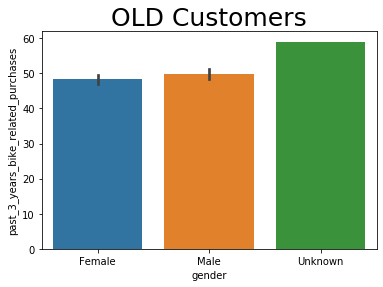

In [59]:
#plt.figure(figsize=(20,15))
sns.barplot(x='gender',y='past_3_years_bike_related_purchases',data=df1);
plt.title('OLD Customers',fontsize=25,loc='center');

In [57]:
data = pd.read_csv('New_cust.csv')
data.columns

Index(['Unnamed: 0', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'state', 'property_valuation'],
      dtype='object')

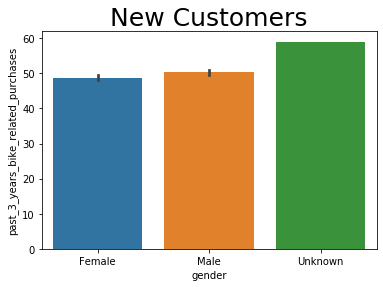

In [58]:
sns.barplot(x='gender',y='past_3_years_bike_related_purchases',data= data)
plt.title('New Customers',fontsize=25,loc='center');

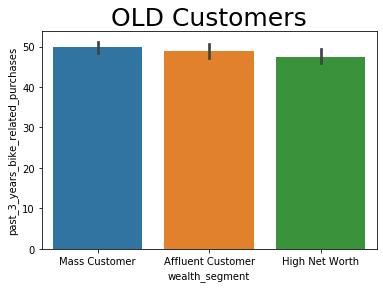

In [42]:
sns.barplot(x='wealth_segment',y='past_3_years_bike_related_purchases',data=df1);
plt.title('OLD Customers',fontsize=25,loc='center');

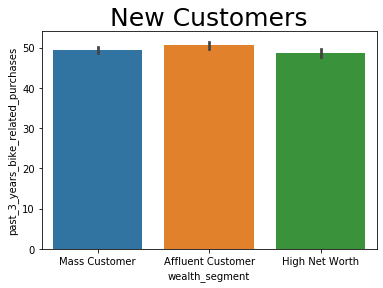

In [60]:
sns.barplot(x='wealth_segment',y='past_3_years_bike_related_purchases',data=data);
plt.title('New Customers',fontsize=25,loc='center');

In [44]:
jobt=df1.groupby("job_title").sum().nlargest(10,'past_3_years_bike_related_purchases')
jobt

,Unnamed: 0,Customer_id,past_3_years_bike_related_purchases,tenure
job_title,,,,
Junior Executive,71245,71283,2323,393.0
Business Systems Development Analyst,95833,95876,2317,490.0
Internal Auditor,68067,68107,2269,415.0
General Manager,84981,85020,2186,364.0
Dental Hygienist,76713,76750,2144,399.0
Product Engineer,79742,79778,2078,363.0
Social Worker,85608,85650,2046,532.0
Chemical Engineer,72424,72461,2035,316.0
Executive Secretary,64224,64259,1993,334.0


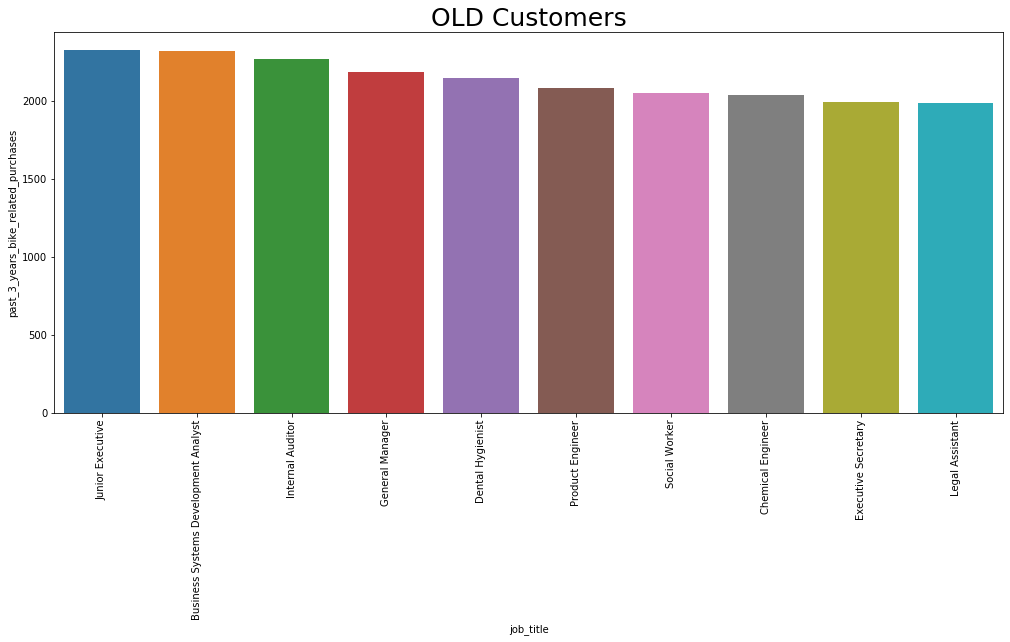

In [45]:
plt.figure(figsize=(17,7))
sns.barplot(x=jobt.index,y='past_3_years_bike_related_purchases',data=jobt,estimator=sum)
plt.xticks(rotation=90) #inter pretation
plt.title('OLD Customers',fontsize=25,loc='center');

In [61]:
jobt1=data.groupby("job_title").sum().nlargest(10,'past_3_years_bike_related_purchases')
jobt1

,Unnamed: 0,past_3_years_bike_related_purchases,tenure,property_valuation
job_title,,,,
Internal Auditor,1551957,11113.0,1796.0,1583.0
Social Worker,2110217,10299.0,2713.0,1619.0
Chemical Engineer,1904734,9730.0,1518.0,1216.0
Food Chemist,1333580,9532.0,1365.0,1318.0
Executive Secretary,1518754,9065.0,1215.0,1075.0
Research Nurse,1546708,9033.0,1793.0,1377.0
Clinical Specialist,1791544,8956.0,1992.0,1613.0
Quality Engineer,1569308,8946.0,1751.0,1219.0
Speech Pathologist,1533510,8881.0,1647.0,1170.0


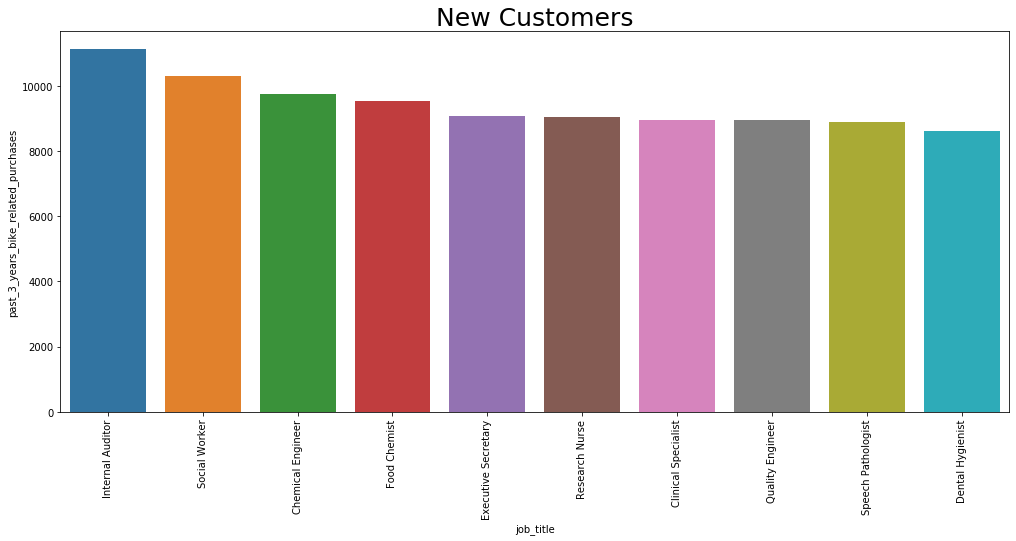

In [62]:
plt.figure(figsize=(17,7))
sns.barplot(x=jobt1.index,y='past_3_years_bike_related_purchases',data=jobt1,estimator=sum)
plt.xticks(rotation=90) #inter pretation
plt.title('New Customers',fontsize=25,loc='center');

Text(0.5, 1.0, 'OLD Customers')

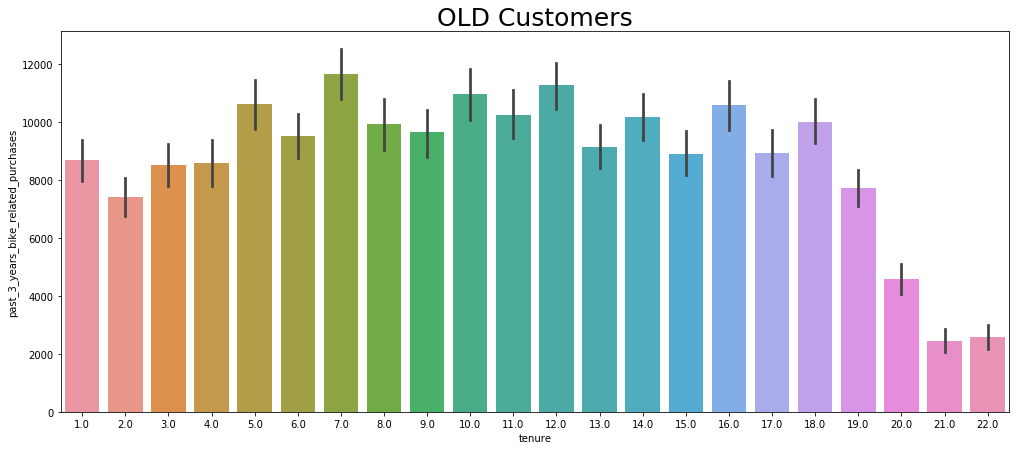

In [46]:
plt.figure(figsize=(17,7))
sns.barplot(x='tenure',y='past_3_years_bike_related_purchases',data=df1,estimator=sum) 
plt.title('OLD Customers',fontsize=25,loc='center')

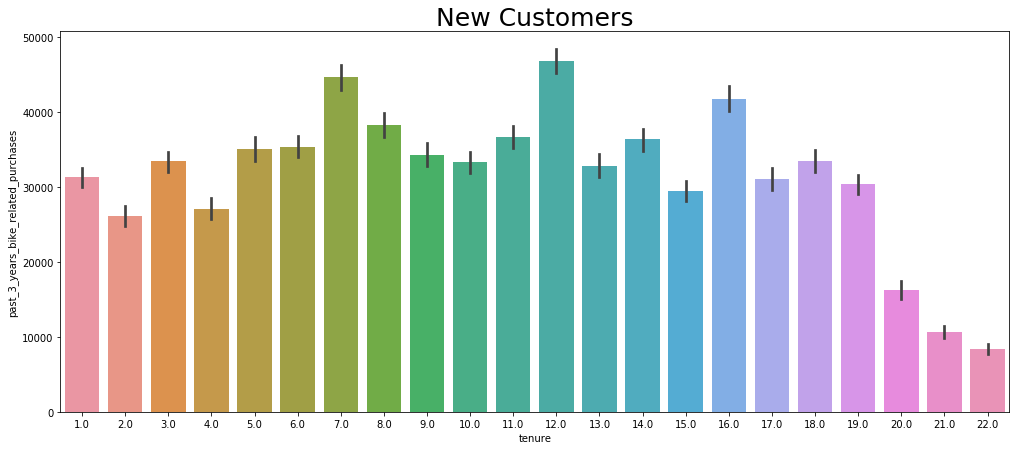

In [63]:
plt.figure(figsize=(17,7))
sns.barplot(x='tenure',y='past_3_years_bike_related_purchases',data=data,estimator=sum) 
plt.title('New Customers',fontsize=25,loc='center');

Text(0.5, 1.0, 'OLD Customers')

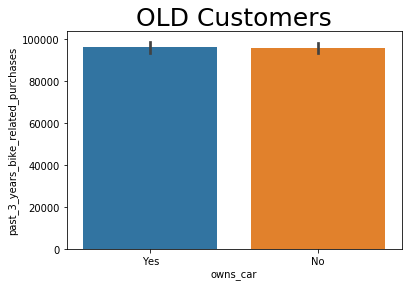

In [64]:
sns.barplot(x='owns_car',y='past_3_years_bike_related_purchases',data=df1,estimator=sum) 
plt.title('OLD Customers',fontsize=25,loc='center')

Text(0.5, 1.0, 'New Customers')

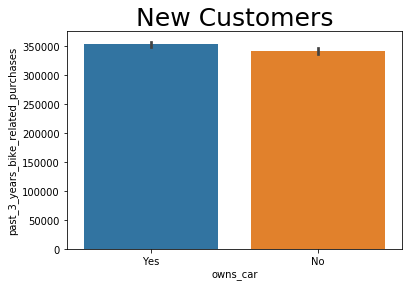

In [65]:
sns.barplot(x='owns_car',y='past_3_years_bike_related_purchases',data=data,estimator=sum) 
plt.title('New Customers',fontsize=25,loc='center')

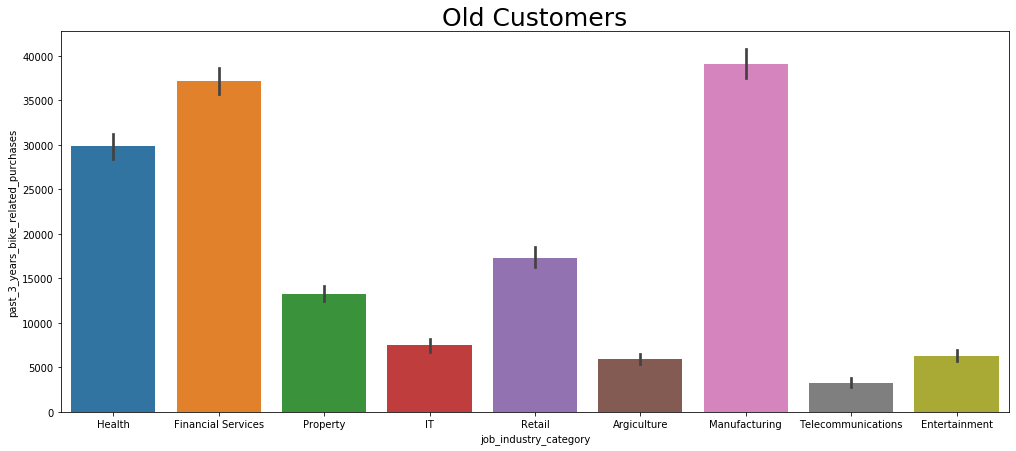

In [50]:
plt.figure(figsize=(17,7))
sns.barplot(x='job_industry_category',y='past_3_years_bike_related_purchases',data=df1,estimator=sum)
plt.title('Old Customers',fontsize=25,loc='center');

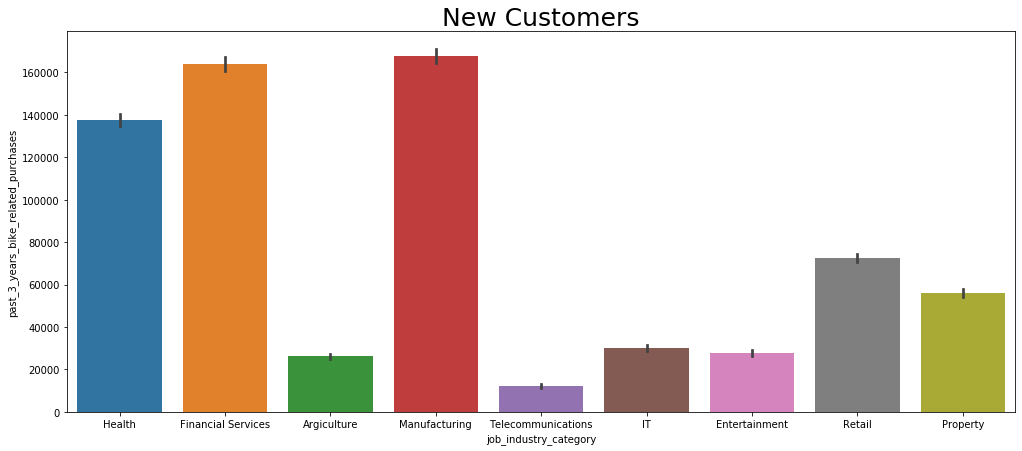

In [66]:
plt.figure(figsize=(17,7))
sns.barplot(x='job_industry_category',y='past_3_years_bike_related_purchases',data=data,estimator=sum)
plt.title('New Customers',fontsize=25,loc='center');